In [2]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Reading the Iris dataset into a DataFrame
iris = pd.read_csv("IRIS.csv")

# Displaying the first 5 rows of the dataset to get a quick overview
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Generating descriptive statistics (mean, std, min, max, etc.) for numerical columns
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Printing the unique target labels (species) in the dataset
print("Target Labels", iris['species'].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
# Importing Plotly I/O module to set the default renderer
import plotly.io as pio

# Setting Plotly to display plots in the browser
pio.renderers.default = "browser"

# Creating a scatter plot of sepal width vs sepal length, colored by species
fig = px.scatter(iris,x="sepal_width",y="sepal_length",color="species")

# Displaying the interactive plot
fig.show()

In [6]:
# Separating features (X) and target labels (y)
X = iris.drop("species",axis=1)
y = iris["species"]

In [7]:
X.corr()
# Correlation analysis summary and conclusion:
# - Petal length and Petal width are highly positively correlated (0.96) and provide the most information for distinguishing species.
# - Sepal length shows a strong positive correlation with Petal length (0.87) and Petal width (0.82), helping to separate overlapping species like Versicolor.
# - Sepal width has weak or negative correlations with other features and contributes less to species separation.
# - Regarding species separability:
#     - Setosa is completely separate and easy to classify using petal measurements.
#     - Virginica is almost separate and also easy to classify.
#     - Versicolor lies between Setosa and Virginica, so using only Petal_length and Petal_width can lead to misclassification.
# Overall, while petal measurements are the most informative, including all features (sepal and petal) ensures better classification performance,
# especially for challenging cases like distinguishing Iris-versicolor from the other species.


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

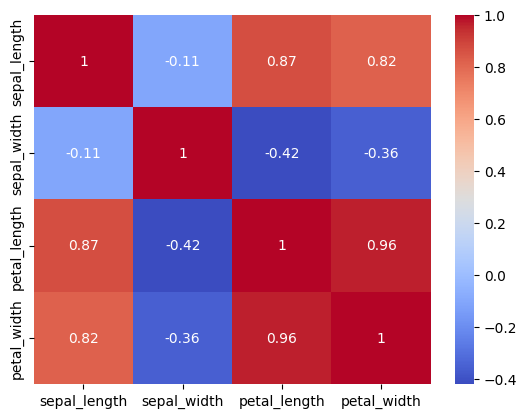

In [8]:
# Plotting a heatmap to visualize how numeric features correlate with each other
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')

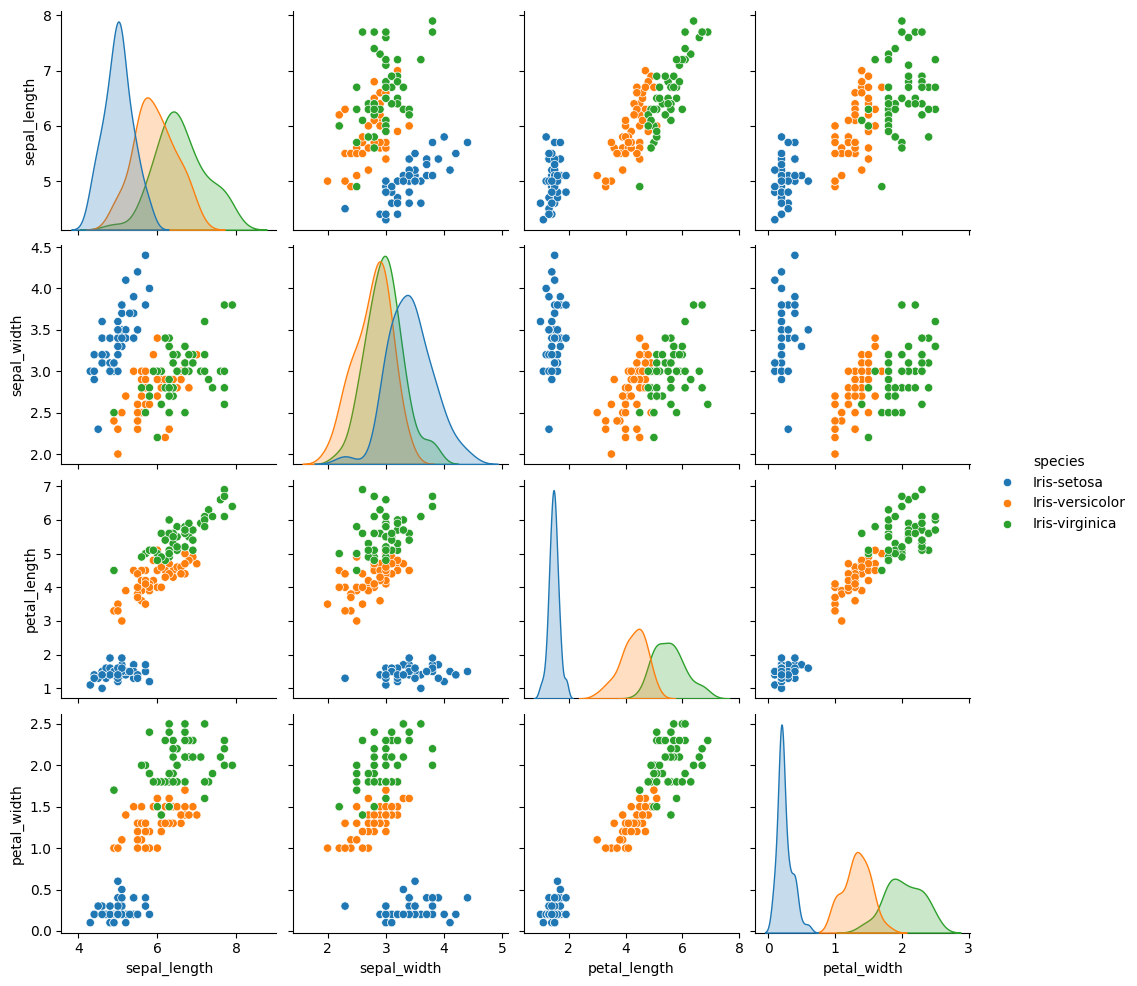

In [9]:
# Pairplot to visualize species separabilit
sns.pairplot(iris, hue="species") 
plt.show()

In [10]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0 )

# Importing K-Nearest Neighbors classifier and creating an instance with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Training the KNN model on the training data
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
# Creating a new sample for prediction
x_new = np.array([[5,2.3,3.3,1]])

# Predicting the class of the new sample
prediction = knn.predict(x_new)
print("Prediction:{}".format(prediction))

Prediction:['Iris-versicolor']


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

